In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

## Consolidate Data

In [58]:
# load and consolidate training data
train_id_df = pd.read_csv('./train_identity.csv')
train_trans_df = pd.read_csv('./train_transaction.csv')
train_df = pd.merge(train_trans_df, train_id_df, on='TransactionID', how='left')

In [113]:
def get_na_dist(data):
    return data.isna().sum().sort_values(ascending=False)

## Plot distribution of NA's across each column

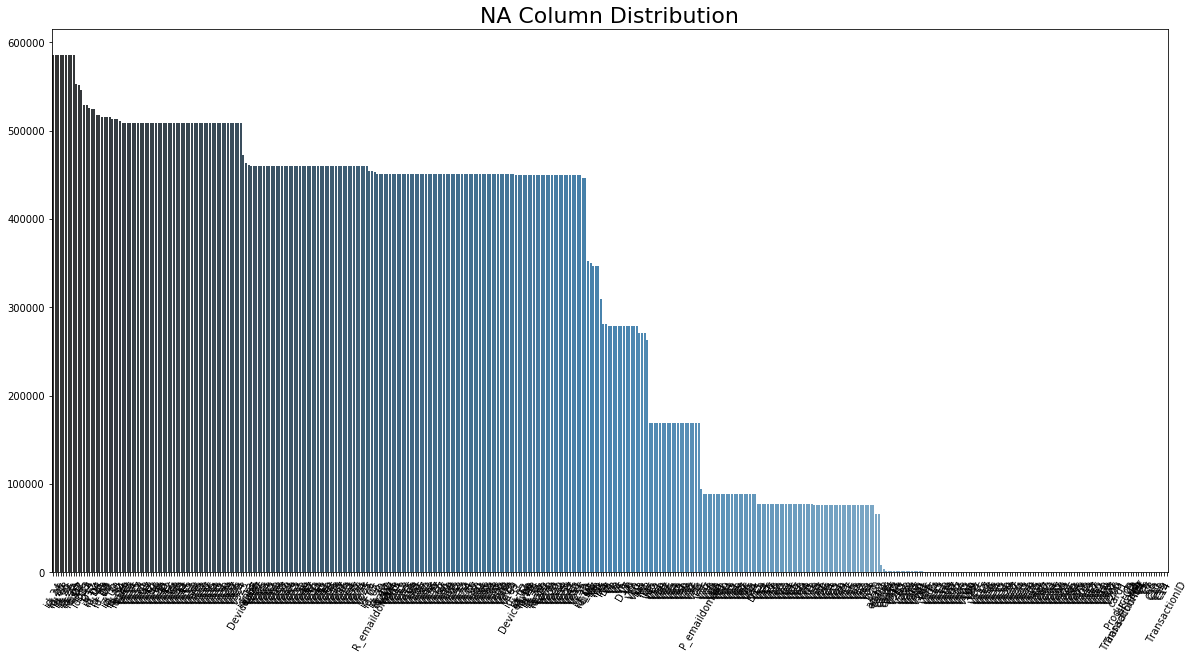

In [114]:
percentage_na_by_column = get_na_dist(train_df)
column_names = get_na_dist(train_df).index

plt.figure(figsize=(20,10))
plt.title("NA Column Distribution", size=22)
plt.xticks(rotation=60)

sns.barplot(y=percentage_na_by_column, x=column_names, palette="Blues_d")

## Do some Feature Engineering

In [115]:
def drop_na(df, tolerance):
    na = pd.DataFrame({ "amount": get_na_dist(df) })
    na["percentage"] = na["amount"] / len(df)
    tolerable_columns = na[na["percentage"] < tolerance].index

    # reset the dataset to only contain the tolerable columns
    return df[df.columns.intersection(tolerable_columns)]

def one_hot_encode_categorical_data(df):
    # get column names of columns containing categorical data
    categorical = df[df.select_dtypes(include=['object']).columns]
    dummies = [df]
    """
    Iterate over each column name
    1. Generate a dummy/one hot data frame
    2. Add dataframe to a list of dataframe
    """
    for category in categorical:
        dummy = pd.get_dummies(boop[category])
        dummies.append(dummy)
    # create a new dataframe that contains no categorical data
    return pd.concat(dummies, axis=1)

#### drop NA's and One Hot Encode categorical data

In [239]:
boop = drop_na(train_df, 0.21)
beep = one_hot_encode_categorical_data(boop)
beep = beep._get_numeric_data()
beep = beep.dropna()

X = beep.drop(["isFraud"], axis=1)
y = beep["isFraud"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80)

In [247]:
test_id_df = pd.read_csv('./test_identity.csv')
test_trans_df = pd.read_csv('./test_transaction.csv')
test_df = pd.merge(test_trans_df, test_id_df, on='TransactionID', how='left')

In [255]:
for i in test_df.columns:
    print(i)

TransactionID
TransactionDT
TransactionAmt
ProductCD
card1
card2
card3
card4
card5
card6
addr1
addr2
dist1
dist2
P_emaildomain
R_emaildomain
C1
C2
C3
C4
C5
C6
C7
C8
C9
C10
C11
C12
C13
C14
D1
D2
D3
D4
D5
D6
D7
D8
D9
D10
D11
D12
D13
D14
D15
M1
M2
M3
M4
M5
M6
M7
M8
M9
V1
V2
V3
V4
V5
V6
V7
V8
V9
V10
V11
V12
V13
V14
V15
V16
V17
V18
V19
V20
V21
V22
V23
V24
V25
V26
V27
V28
V29
V30
V31
V32
V33
V34
V35
V36
V37
V38
V39
V40
V41
V42
V43
V44
V45
V46
V47
V48
V49
V50
V51
V52
V53
V54
V55
V56
V57
V58
V59
V60
V61
V62
V63
V64
V65
V66
V67
V68
V69
V70
V71
V72
V73
V74
V75
V76
V77
V78
V79
V80
V81
V82
V83
V84
V85
V86
V87
V88
V89
V90
V91
V92
V93
V94
V95
V96
V97
V98
V99
V100
V101
V102
V103
V104
V105
V106
V107
V108
V109
V110
V111
V112
V113
V114
V115
V116
V117
V118
V119
V120
V121
V122
V123
V124
V125
V126
V127
V128
V129
V130
V131
V132
V133
V134
V135
V136
V137
V138
V139
V140
V141
V142
V143
V144
V145
V146
V147
V148
V149
V150
V151
V152
V153
V154
V155
V156
V157
V158
V159
V160
V161
V162
V163
V164
V165
V166
V167
V168
V1

## Modeling

#### train logistic model

In [240]:
lr = LogisticRegression(solver='lbfgs', class_weight='balanced')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,292654,39428,332082
1,4135,2751,6886
All,296789,42179,338968


In [242]:
recall_score(y_test, y_pred)

0.3995062445541679

In [241]:
accuracy_score(y_test, y_pred)

0.8714834438649076